In [1]:
import cse
import matplotlib.pyplot as plt
import numpy as np

ev2Ha = 3.67493e-2
cm2Ha = 4.55634e-6
cm2MHz = 2.99792e4
ev2cm = 8065.541
ev2MHz = 2.41799e8
aBohr = 0.52917721067


sr2 = cse.Cse('86Sr', VT=['../potentials/srGS_halo.dat'])

sr2.VT = (sr2.VT - sr2.VT.min())/ev2cm

In [2]:
# 86 - 61 - 0.134104682938705 - d=0.01 - rInf=1000 A
# 86 - 61 - 0.134104693906399 - d=0.005 - rInf=1000 A
# 86 - 61 - 0.134104693906909 - d=0.005 - rInf=1000 A
# 86 - 61 - 0.134104694611904 - d=0.002 - rInf=200 A
# 86 - 61 - 0.134104694629240 - d=0.001 - rInf=200 A

# 86 - 62 - 0.134106053429147 - d=0.005 - rInk=1000 A

#V(r=100) = 0.134105430651553

sr2.solve(sr2.VT[0,0,-1] - 4e-10)
wf0 = sr2.wavefunction[:, 0]
en0 = sr2.energy
sr2

c:\git\pydiatomic\cse\expectation.py:199: RuntimeWarning: divide by zero encountered in double_scalars
  xx = (olap - ort*R1[mid1])/(orsav - diag[mid1]*ort)
c:\git\pydiatomic\cse\expectation.py:152: RuntimeWarning: invalid value encountered in multiply
  g *= R1
c:\git\pydiatomic\env0\lib\site-packages\scipy\integrate\quadrature.py:360: RuntimeWarning: invalid value encountered in add
  y[slice1]*hsum*hsum/hprod +
c:\git\pydiatomic\env0\lib\site-packages\scipy\integrate\quadrature.py:361: RuntimeWarning: invalid value encountered in add
  y[slice2]*(2-h0divh1))
c:\git\pydiatomic\env0\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)



Molecule: 86Sr  mass: 7.13278e-26 kg, 42.9546 amu
Electronic state: ../potentials/srGS_halo.dat
eigenvalues (that have been evaluated for this state):
 v  rot   energy(cm-1)    Bv(cm-1)     Dv(cm-1)
62   0   1081.632980       0.00003            nan

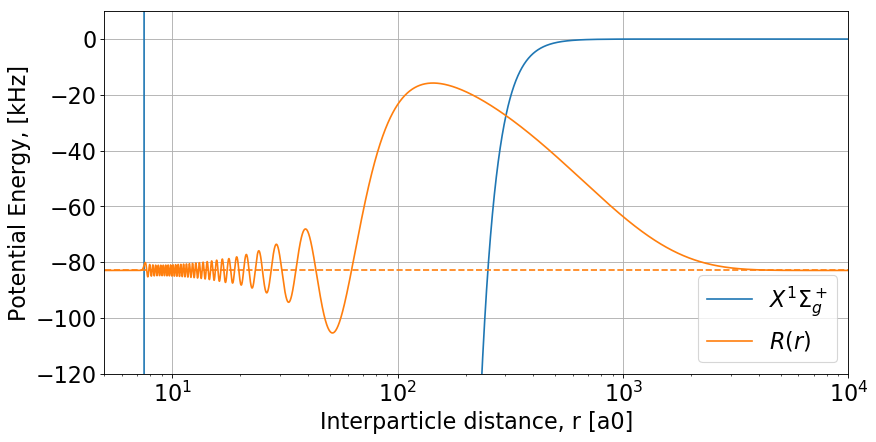

In [14]:
plt.figure(num=None, figsize=(12, 6), dpi=80, facecolor='w', edgecolor='k')

R = sr2.R/aBohr
V = (sr2.VT[0, 0] - sr2.VT[0,0,-1])*ev2MHz*1e3
#wf = -2000*wf0 + (en0 - sr2.VT[0,0,-1])*ev2MHz*1e3
wf = -1000*wf0 -83
pd = 2.5*np.power(np.absolute(wf0),2) + (en0 - sr2.VT[0,0,-1])*ev2MHz*1e3


plt.plot(R, V, label='$X^1\Sigma_g^+$')
hanEnWF = plt.plot([1, 1e5], [wf[-1], wf[-1]], '--', )
hanWF = plt.plot(R, wf, label='$R(r)$', c=hanEnWF[0].get_color())

plt.axis(xmin=5, xmax=1e4, ymin=-120, ymax=10)
plt.xscale('log')
plt.xlabel('Interparticle distance, r [a0]')
plt.ylabel('Potential Energy, [kHz]')

plt.rcParams.update({'font.size': 20})
plt.legend(); plt.grid(1);

plt.savefig('radialHaloWF.svg')
plt.show()

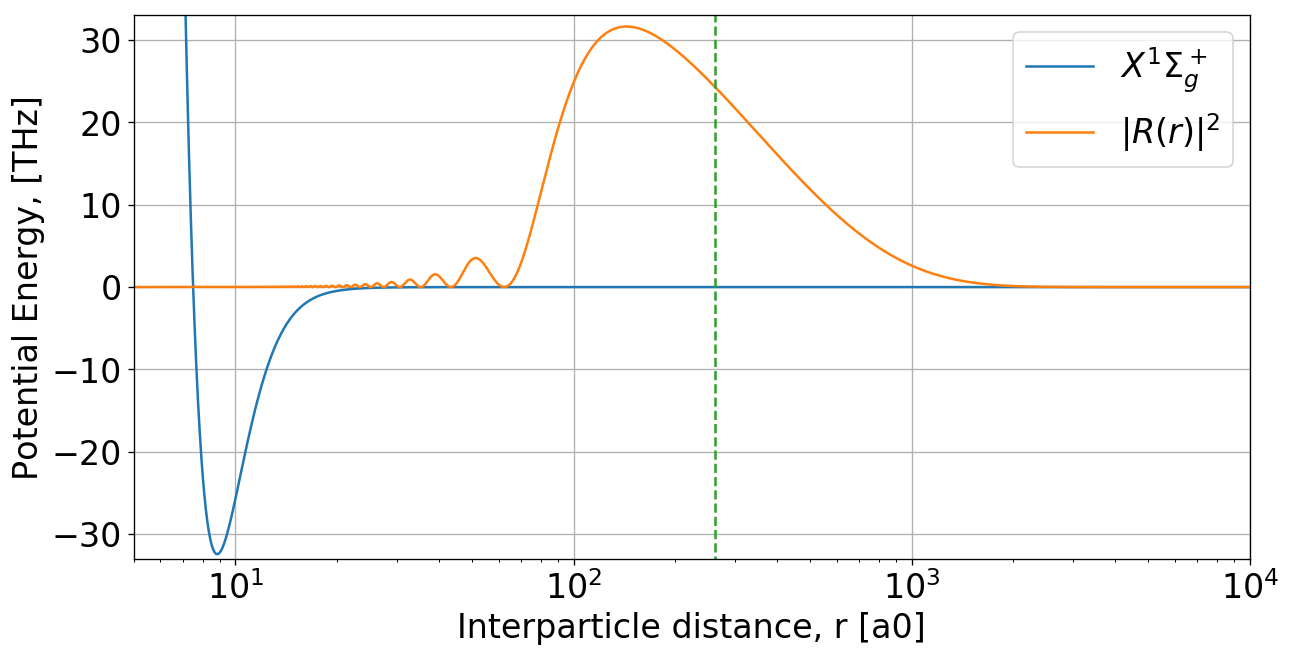

In [15]:
plt.figure(num=None, figsize=(12, 6), dpi=120, facecolor='w', edgecolor='k')

R = sr2.R/aBohr
V = (sr2.VT[0, 0] - sr2.VT[0,0,-1])*ev2MHz*1e-6
#wf = -2000*wf0 + (en0 - sr2.VT[0,0,-1])*ev2MHz*1e3
#wf_aman = -1000*wf0 -83
pd = 7e3*np.power(np.absolute(wf0),2)

plt.plot(R, V, label='$X^1\Sigma_g^+$')
plt.plot(R, pd, label='$|R(r)|^2$')
plt.plot([262, 262], [-100, 100], '--')
#plt.plot(R, wf) 

plt.axis(xmin=5, xmax=1e4, ymin=-33, ymax=33)
plt.xscale('log')
plt.xlabel('Interparticle distance, r [a0]')
plt.ylabel('Potential Energy, [THz]')

plt.rcParams.update({'font.size': 20})
plt.legend(); plt.grid(1);

plt.savefig('radialHaloProb.svg')
plt.show()

In [29]:
data = np.column_stack((sr2.R, -1*sr2.wavefunction[:, 0]))
np.savetxt("../data/86sr2_halo.dat", data)

In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#default value is "last_expr"